# Linear Regression

creating a dataset which has 2 columns- weight and height.
weight is between 50-70(in kgs) and height in between 150 - 190(in cms).

model will take weight and predict height.

#### Aim - find best fit line with minimal error.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.random.randint(50,70,size=(1000)) #generates 1-D array of 10 elements of integers between 50 to 70
X.sort()
print("X: ",X)

y = np.random.randint(150,190,size=(1000)) # corresponding height for weights
print("y: ",y)
y.sort()

dataset = np.column_stack((X,y))
print("dataset: ",dataset)

df = pd.DataFrame(dataset)
df

X:  [50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51
 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51
 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 52 52 52
 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52
 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52
 52 52 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53
 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53
 53 53 53 53 53 53 53 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55
 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55
 55 55 55 55 55 55 55 55 55 55 55 55 55 56 56 5

,0,1
0,50,150
1,50,150
2,50,150
3,50,150
4,50,150
...,...,...
995,69,189
996,69,189
997,69,189
998,69,189


Visualizing the data

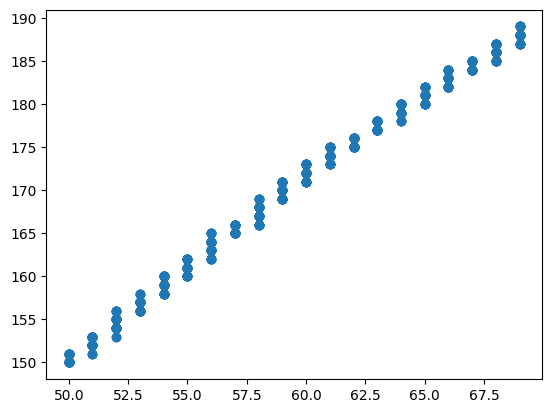

In [2]:
plot = plt.plot(X,y,"o")

### 📌 Cost Function (Linear Regression)

The cost function we minimize in Linear Regression is the **Mean Squared Error (MSE):**

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \big( h_\theta(x^{(i)}) - y^{(i)} \big)^2
$$

Where:  
- $$ {m}  = number-of-training-examples $$
- $$ h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)} $$ (the hypothesis/predicted value)  
- $$ y^{(i)}  = actual-target-value $$ 
- $$ \theta  = parameters    $$ (intercept-and-slope_in_simple_regression)


### Global minima- value of theta where cost function is minimized.

## Gradient Descent-

we user Repeat convergence theorem to update value of theta with each step to find optimal value that will minimize the cost function.

### Repeat convergence theorem- 

### 📌 Gradient Descent Update Rule

The parameters $\theta_j$ are updated using:

$$
\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

Where:  
- $\alpha$ = learning rate  
- $J(\theta)$ = cost function  
- $\frac{\partial J(\theta)}{\partial \theta_j}$ = partial derivative of the cost with respect to $\theta_j$ (slope)


so, when slope is negative, theta will increase and when slope is positive, theta will decrease.

this will continue till we get theta that minimizes cost function.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

predictions = lin_reg.predict(X_test)

error = mean_squared_error(y_test,predictions)
print(error)

0.692477072692086


# Logistic Regression

Data for Logistic regression

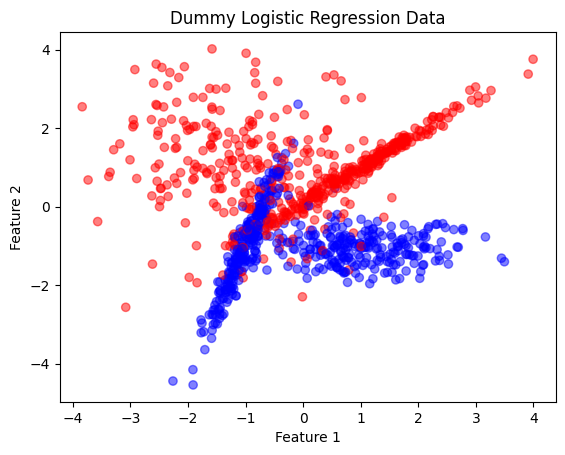

In [4]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate dummy dataset
X, y = make_classification(
    n_samples=1000,     # number of samples
    n_features=2,       # number of features
    n_informative=2,    # number of useful features
    n_redundant=0,      # no redundant features
    n_classes=2,        # binary classification
    random_state=42
)

# Quick visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dummy Logistic Regression Data")
plt.show()


### Logistic regression is used for classification

In [5]:
dataset_logi = np.column_stack((X,y))
df_logi = pd.DataFrame(dataset_logi)
df_logi

,0,1,2
0,-0.999102,-0.663860,1.0
1,1.246686,1.153597,1.0
2,0.962777,0.859397,1.0
3,-2.957441,2.033645,1.0
4,1.141165,1.059449,1.0
...,...,...,...
995,-0.432774,0.890930,0.0
996,1.020438,1.164617,1.0
997,-0.101267,-1.590176,0.0
998,0.643761,-0.780539,0.0


(1000, 2)
(1000, 1)


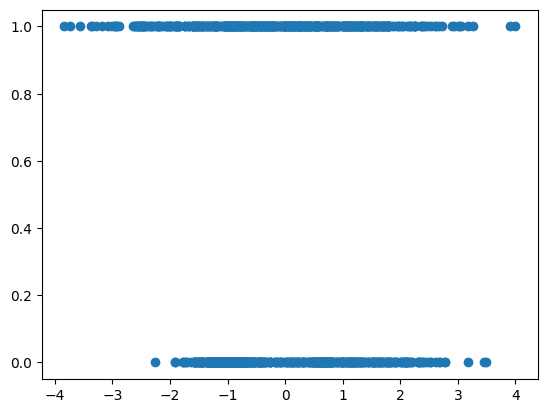

In [6]:
print(X.shape)
y = y.reshape(-1, 1)
print(y.shape)

plt.scatter(X[:, 0],y)
# X[:, 0] takes first column of each row